## Load Libraries

In [2]:
# Load Libraries
#!pip install imbalanced-learn
import pandas as pd, numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data import TensorDataset, DataLoader
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from yellowbrick.classifier import ROCAUC



## 1. Import Data

In [13]:
# Import data
df = pd.read_csv("Churn_Modelling.csv")


print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

## 2. Data Preprocessing

In [14]:
# Data Pre-Processing

# 1. Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
# No Missing Value Found

# 2. Drop irrelevant variables
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# 3. One-Hot Encoding for categorical variables
categorical_features = ['Geography', 'Gender' , 'Tenure', ]
df = pd.get_dummies(df, columns=categorical_features)

print(df)

Missing values in each column:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
      CreditScore  Age    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0             619   42       0.00              1          1               1   
1             608   41   83807.86              1          0               1   
2             502   42  159660.80              3          1               0   
3             699   39       0.00              2          0               0   
4             850   43  125510.82              1          1               1   
...           ...  ...        ...            ...        ...             ...   
9995          771   39       0.00              2          1               0   
9996          516   35   5736

## 3. Split it into training, Validation, and Testing sets

In [20]:
# Assuming df, X, and y are predefined as per your dataset
X = df.drop('Exited', axis=1).values
y = df['Exited'].values

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)

# First split to separate out the test set
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Second split to separate out the training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Convert the scaled data to PyTorch tensors for training set
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)

# Convert the scaled data to PyTorch tensors for validation set
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val)

# Convert the scaled data to PyTorch tensors for testing set
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)


In [24]:

# Define batch size for DataLoader
batch_size = 32  # Adjust as necessary for your dataset and model.

# Create TensorDataset objects
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader objects
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Now, `train_loader`, `val_loader`, and `test_loader` are ready to be used in the training loop.


## 4. Model 1 - Experiment with Simple Feed-Forward Neural Network Model

Epoch 1/100: Train Loss: 0.7406, Train Acc: 0.3005, Val Loss: 0.6300, Val Acc: 0.8030
Epoch 11/100: Train Loss: 0.5257, Train Acc: 0.1447, Val Loss: 0.6090, Val Acc: 0.8270
Epoch 21/100: Train Loss: 0.4399, Train Acc: 0.1405, Val Loss: 0.7675, Val Acc: 0.8105
Epoch 31/100: Train Loss: 0.3705, Train Acc: 0.1150, Val Loss: 0.9253, Val Acc: 0.8220
Epoch 41/100: Train Loss: 0.3466, Train Acc: 0.1067, Val Loss: 1.2257, Val Acc: 0.8135
Epoch 51/100: Train Loss: 0.3118, Train Acc: 0.0963, Val Loss: 1.1364, Val Acc: 0.7990
Epoch 61/100: Train Loss: 0.2686, Train Acc: 0.0853, Val Loss: 1.8337, Val Acc: 0.8025
Epoch 71/100: Train Loss: 0.3006, Train Acc: 0.1042, Val Loss: 1.2077, Val Acc: 0.7850
Epoch 81/100: Train Loss: 0.2599, Train Acc: 0.0807, Val Loss: 1.5678, Val Acc: 0.8015
Epoch 91/100: Train Loss: 0.2345, Train Acc: 0.0915, Val Loss: 2.0992, Val Acc: 0.8005
Epoch 100/100: Train Loss: 0.2346, Train Acc: 0.0877, Val Loss: 1.8248, Val Acc: 0.8090


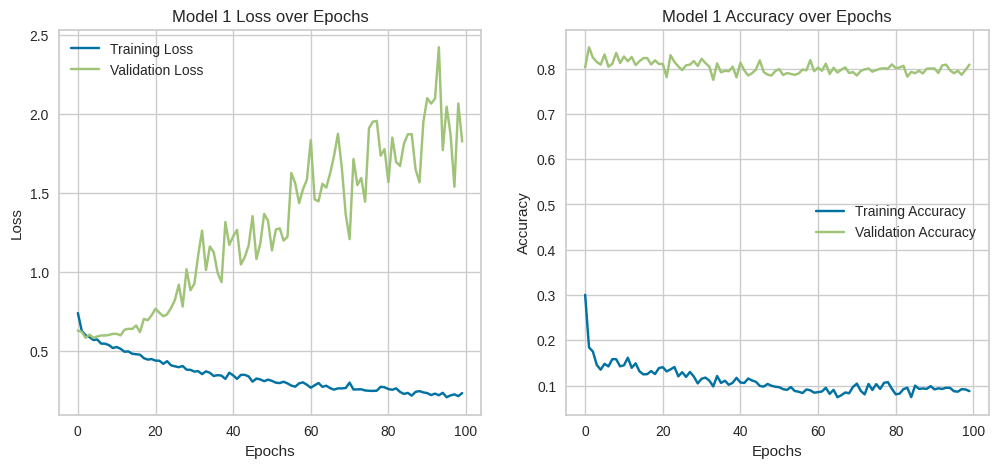


Final Metrics on Test Set:
Accuracy: 0.7990
Precision: 0.4904
Recall: 0.5827
F1 Score: 0.5326

Test Classification Report on Model 1:
               precision    recall  f1-score   support

     Class 0       0.89      0.85      0.87      1607
     Class 1       0.49      0.58      0.53       393

    accuracy                           0.80      2000
   macro avg       0.69      0.72      0.70      2000
weighted avg       0.81      0.80      0.81      2000



In [57]:

class DeepNeuralNetwork(nn.Module):
    def __init__(self):
        super(DeepNeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(23, 64)
        self.layer_2 = nn.Linear(64, 64)
        self.layer_3 = nn.Linear(64, 32)
        self.layer_out = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)  # Remove sigmoid when using BCEWithLogitsLoss
        return x

# Instantiate the model
model = DeepNeuralNetwork()


# Compute class weights for handling imbalanced classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)


# Define the loss function and the optimizer
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights_tensor[1])  # Correct criterion for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Initialize lists to keep track of metrics
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Training and validation loop with batch processing
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    total_train_loss = 0
    total_train_correct = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs).squeeze()  # Squeezing the model output to match the target tensor shape
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
        total_train_correct += (outputs.round() == labels).float().sum().item()

    train_losses.append(total_train_loss / len(train_loader))
    train_accuracies.append(total_train_correct / len(train_loader.dataset))

    # Validation phase
    model.eval()  # Set model to evaluation mode
    total_val_loss = 0.0
    total_val_correct = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            val_outputs = model(inputs).squeeze()
            val_loss = criterion(val_outputs, labels.view_as(val_outputs))  # Ensure labels are the correct shape
            total_val_loss += val_loss.item()
            val_pred = torch.round(torch.sigmoid(val_outputs))
            total_val_correct += (val_pred == labels).sum().item()

    val_losses.append(total_val_loss / len(val_loader))
    val_accuracies.append(total_val_correct / len(val_dataset))


    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f'Epoch {epoch+1}/{epochs}: Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}')


# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Model 1 Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Model 1 Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Final evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = torch.sigmoid(y_pred_tensor).round().detach().numpy()  # Apply sigmoid and round for binary predictions
    y_true = y_test_tensor.detach().numpy()

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='binary')
recall = recall_score(y_true, y_pred, average='binary')
f1 = f1_score(y_true, y_pred, average='binary')

# Print the final metrics
print(f'\nFinal Metrics on Test Set:')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Print the final classification report for the test set
classification_report_test = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'])
print("\nTest Classification Report on Model 1:\n", classification_report_test)


## 5. Model 2 - Experiments with Different of Activation functions and Learning Rate with a Flexible Network Architectures

In [34]:
class CustomNeuralNetwork(nn.Module):
    def __init__(self, activation_fn_class=nn.ReLU, num_neurons=[23, 128, 64, 32]):
        super(CustomNeuralNetwork, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(num_neurons)-1):
            self.layers.append(nn.Linear(num_neurons[i], num_neurons[i+1]))
            if i < len(num_neurons) - 2:  # No activation function before the output layer
                self.layers.append(activation_fn_class())
        self.output = nn.Linear(num_neurons[-1], 1)

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        x = self.output(x)
        return x


In [37]:


# Initialize an empty dictionary to store classification reports
classification_reports = {}

# Experienments with Activation functions
activation_functions = [nn.ReLU, nn.LeakyReLU, nn.ELU, nn.PReLU]

# Experienments with Learning Rates
learning_rates = [0.01, 0.001, 0.0001]


for activation_fn_class in activation_functions:
    for lr in learning_rates:
        # Re-instantiate the model for each combination
        model = CustomNeuralNetwork(activation_fn_class=activation_fn_class, num_neurons=[23, 128, 64, 32])
        optimizer = optim.Adam(model.parameters(), lr=lr)
        criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights_tensor[1])

        print(f"\nTraining with activation function: {activation_fn_class.__name__}, learning rate: {lr}")

        # Training and validation loop
        for epoch in range(epochs):
            model.train()  # Set model to training mode
            optimizer.zero_grad()
            outputs = model(X_train_tensor)
            loss = criterion(outputs.squeeze(), y_train_tensor)
            loss.backward()
            optimizer.step()

            # Validation phase
            model.eval()  # Set model to evaluation mode
            with torch.no_grad():
                val_outputs = model(X_val_tensor)
                val_loss = criterion(val_outputs.squeeze(), y_val_tensor)

        # Evaluate the model on the test set after training
        model.eval()
        with torch.no_grad():
            y_pred_tensor = model(X_test_tensor)
            # Convert logits to probabilities
            y_pred_probs = torch.sigmoid(y_pred_tensor).numpy()
            # Define a threshold to classify predictions
            threshold = 0.5
            y_pred_class = (y_pred_probs >= threshold).astype(int)
            y_true = y_test_tensor.detach().numpy()

            # Generate the classification report
            report = classification_report(y_true, y_pred_class, target_names=['Not Exited', 'Exited'], output_dict=True)

            # Store the classification report in the dictionary
            classification_reports[(activation_fn_class.__name__, lr)] = report

            # Print the classification report for current configuration
            print(f"\nClassification Report for activation function {activation_fn_class.__name__}, learning rate {lr}:")
            print(classification_report(y_true, y_pred_class, target_names=['Not Exited', 'Exited']))

# Start with an empty dictionary to store model configurations and their macro F1 scores
model_performance = {}

# Extract macro F1 scores and store them
for key, report in classification_reports.items():
    macro_f1_score = report['macro avg']['f1-score']
    model_performance[key] = macro_f1_score

# Find the best model configuration
best_model = max(model_performance, key=model_performance.get)
best_score = model_performance[best_model]

print(f"\nThe best model configuration is {best_model} with a macro average F1 score of {best_score:.4f}")




Training with activation function: ReLU, learning rate: 0.01

Classification Report for activation function ReLU, learning rate 0.01:
              precision    recall  f1-score   support

  Not Exited       0.89      0.88      0.88      1607
      Exited       0.52      0.53      0.53       393

    accuracy                           0.81      2000
   macro avg       0.70      0.71      0.70      2000
weighted avg       0.81      0.81      0.81      2000


Training with activation function: ReLU, learning rate: 0.001

Classification Report for activation function ReLU, learning rate 0.001:
              precision    recall  f1-score   support

  Not Exited       0.91      0.84      0.87      1607
      Exited       0.50      0.64      0.56       393

    accuracy                           0.81      2000
   macro avg       0.70      0.74      0.72      2000
weighted avg       0.83      0.81      0.81      2000


Training with activation function: ReLU, learning rate: 0.0001

Classific

### Conclusion

Based on the above experiments, it is found that the best model configuration is ('ELU', 0.001) with a macro average F1 score of 0.7343.

Therefore, the remainder of the notebook will delve into analyzing the performance of this model. This exploration will encompass various key metrics and visualizations, including:

- An evaluation of the model's accuracy over time, charted across the epochs to observe improvements or changes in the model's ability to correctly predict the test data.

- A look at the model's loss over time, which will help in understanding how the model's error rate decreases during training and validation phases.

- An examination of the model's performance through its classification report, providing insights into precision, recall, F1-score, and support for each class.

- An analysis of the model's Receiver Operating Characteristic (ROC) curve, offering a graphical representation of the model's diagnostic ability across different threshold settings.

These components will collectively offer a comprehensive view of the model's effectiveness and areas for potential improvement.

## Model Performance Evaluation
### (1). Model Accuracy over Epoches


Training with activation function: ELU, learning rate: 0.001
Epoch 1/100, Loss: 0.9204, Validation Loss: 0.9060, Training Accuracy: 0.2240, Validation Accuracy: 0.2935
Epoch 11/100, Loss: 0.7927, Validation Loss: 0.7772, Training Accuracy: 0.7585, Validation Accuracy: 0.7700
Epoch 21/100, Loss: 0.7350, Validation Loss: 0.7187, Training Accuracy: 0.7770, Validation Accuracy: 0.7765
Epoch 31/100, Loss: 0.7283, Validation Loss: 0.7131, Training Accuracy: 0.7657, Validation Accuracy: 0.7760
Epoch 41/100, Loss: 0.7187, Validation Loss: 0.7077, Training Accuracy: 0.7765, Validation Accuracy: 0.7810
Epoch 51/100, Loss: 0.7117, Validation Loss: 0.7025, Training Accuracy: 0.7808, Validation Accuracy: 0.7905
Epoch 61/100, Loss: 0.7013, Validation Loss: 0.6932, Training Accuracy: 0.7780, Validation Accuracy: 0.7885
Epoch 71/100, Loss: 0.6845, Validation Loss: 0.6786, Training Accuracy: 0.7868, Validation Accuracy: 0.7955
Epoch 81/100, Loss: 0.6544, Validation Loss: 0.6521, Training Accuracy: 0.7

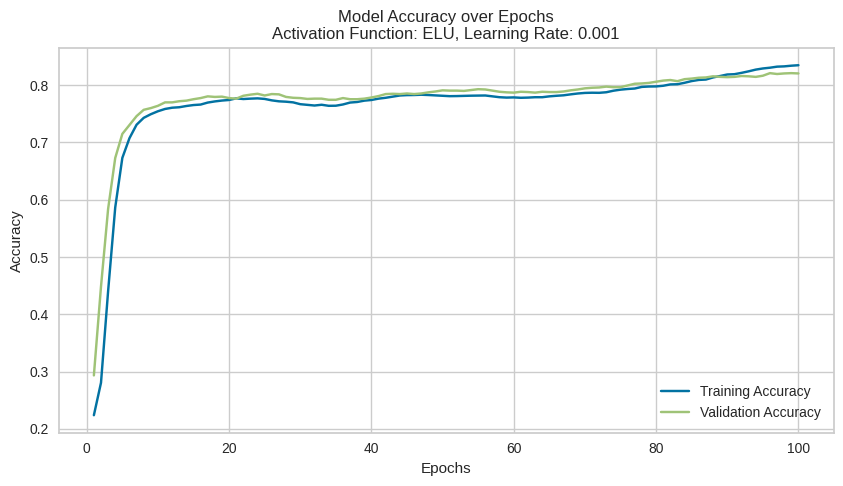

In [49]:
# Best model configuration
best_activation_fn_class = nn.ELU
best_lr = 0.001

# Initialize empty lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Re-instantiate the best model
model = CustomNeuralNetwork(activation_fn_class=best_activation_fn_class, num_neurons=[23, 128, 64, 32])
optimizer = optim.Adam(model.parameters(), lr=best_lr)
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights_tensor[1])

print(f"\nTraining with activation function: {best_activation_fn_class.__name__}, learning rate: {best_lr}")

# Training and validation loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()

    # Validation phase
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs.squeeze(), y_val_tensor)

    # Evaluate training and validation accuracy
    train_accuracy = accuracy_score(y_train_tensor.detach().numpy(), (torch.sigmoid(outputs) >= 0.5).float().detach().numpy())
    val_accuracy = accuracy_score(y_val_tensor.detach().numpy(), (torch.sigmoid(val_outputs) >= 0.5).float().detach().numpy())

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    if epoch % 10 == 0 or epoch == epochs - 1:  # Print metrics every 10 epochs and the last epoch
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Plot the training and validation accuracies over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'Model Accuracy over Epochs\nActivation Function: {best_activation_fn_class.__name__}, Learning Rate: {best_lr}')
plt.legend()
plt.show()


### (2). Model Loss over Epoches


Training with activation function: PReLU, learning rate: 0.001
Epoch 1/100, Loss: 0.9340, Validation Loss: 0.9244
Epoch 11/100, Loss: 0.8377, Validation Loss: 0.8300
Epoch 21/100, Loss: 0.7667, Validation Loss: 0.7513
Epoch 31/100, Loss: 0.7316, Validation Loss: 0.7142
Epoch 41/100, Loss: 0.7156, Validation Loss: 0.7054
Epoch 51/100, Loss: 0.7029, Validation Loss: 0.6991
Epoch 61/100, Loss: 0.6884, Validation Loss: 0.6876
Epoch 71/100, Loss: 0.6692, Validation Loss: 0.6778
Epoch 81/100, Loss: 0.6405, Validation Loss: 0.6597
Epoch 91/100, Loss: 0.5983, Validation Loss: 0.6361
Epoch 100/100, Loss: 0.5578, Validation Loss: 0.6165


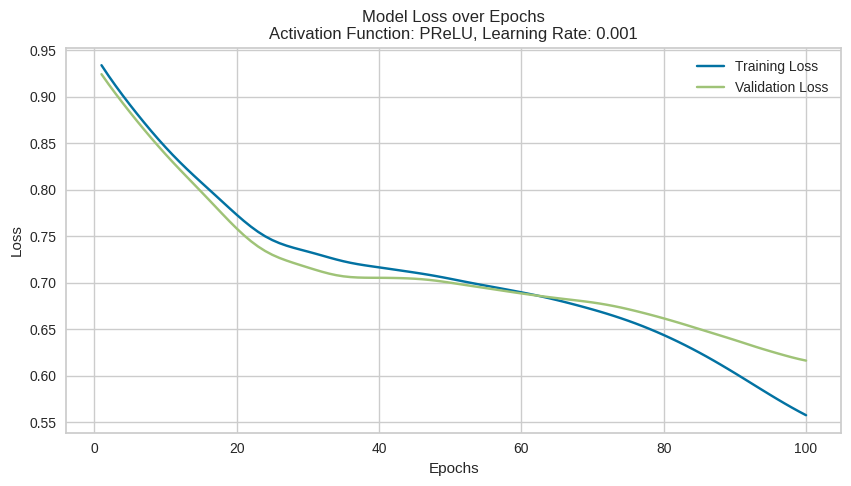

In [50]:
# Best model configuration
best_activation_fn_class = nn.PReLU
best_lr = 0.001

# Initialize empty lists to store training and validation losses
train_losses = []
val_losses = []

# Re-instantiate the best model
model = CustomNeuralNetwork(activation_fn_class=best_activation_fn_class, num_neurons=[23, 128, 64, 32])
optimizer = optim.Adam(model.parameters(), lr=best_lr)
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights_tensor[1])

print(f"\nTraining with activation function: {best_activation_fn_class.__name__}, learning rate: {best_lr}")

# Training and validation loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()

    # Validation phase
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs.squeeze(), y_val_tensor)

    # Append losses to lists
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if epoch % 10 == 0 or epoch == epochs - 1:  # Print metrics every 10 epochs and the last epoch
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Plot the training and validation losses over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Model Loss over Epochs\nActivation Function: {best_activation_fn_class.__name__}, Learning Rate: {best_lr}')
plt.legend()
plt.show()


### (3). ROC Curve


Training with activation function: ELU, learning rate: 0.001
Epoch 1/100, Loss: 0.9466, Validation Loss: 0.9340, Training Accuracy: 0.2053, Validation Accuracy: 0.2100
Epoch 11/100, Loss: 0.8137, Validation Loss: 0.8033, Training Accuracy: 0.7128, Validation Accuracy: 0.7285
Epoch 21/100, Loss: 0.7341, Validation Loss: 0.7194, Training Accuracy: 0.7748, Validation Accuracy: 0.7870
Epoch 31/100, Loss: 0.7257, Validation Loss: 0.7101, Training Accuracy: 0.7755, Validation Accuracy: 0.7795
Epoch 41/100, Loss: 0.7146, Validation Loss: 0.7057, Training Accuracy: 0.7720, Validation Accuracy: 0.7785
Epoch 51/100, Loss: 0.7067, Validation Loss: 0.6993, Training Accuracy: 0.7885, Validation Accuracy: 0.7930
Epoch 61/100, Loss: 0.6944, Validation Loss: 0.6885, Training Accuracy: 0.7855, Validation Accuracy: 0.7935
Epoch 71/100, Loss: 0.6750, Validation Loss: 0.6737, Training Accuracy: 0.7940, Validation Accuracy: 0.7975
Epoch 81/100, Loss: 0.6430, Validation Loss: 0.6478, Training Accuracy: 0.8

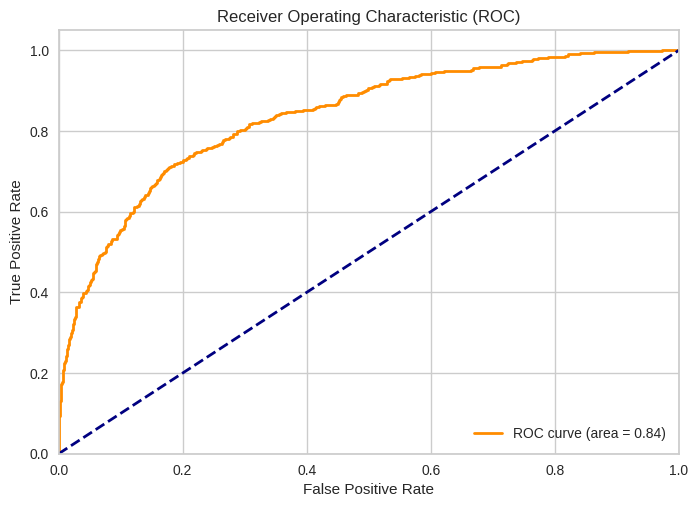

In [51]:

# Best model configuration
best_activation_fn_class = nn.ELU
best_lr = 0.001

# Initialize empty lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Re-instantiate the best model
model = CustomNeuralNetwork(activation_fn_class=best_activation_fn_class, num_neurons=[23, 128, 64, 32])
optimizer = optim.Adam(model.parameters(), lr=best_lr)
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights_tensor[1])

print(f"\nTraining with activation function: {best_activation_fn_class.__name__}, learning rate: {best_lr}")

# Training and validation loop
for epoch in range(epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()

    # Validation phase
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs.squeeze(), y_val_tensor)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train_tensor.cpu().numpy(), (torch.sigmoid(outputs).cpu() >= 0.5).float().numpy())
    val_accuracy = accuracy_score(y_val_tensor.cpu().numpy(), (torch.sigmoid(val_outputs).cpu() >= 0.5).float().numpy())

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    if epoch % 10 == 0 or epoch == epochs - 1:  # Print metrics every 10 epochs and the last epoch
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}, Training Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')


# After training, evaluate on test set and plot ROC curve
model.eval()
with torch.no_grad():
    y_test_pred_probs = torch.sigmoid(model(X_test_tensor)).cpu().numpy()

fpr, tpr, _ = roc_curve(y_test_tensor.cpu().numpy(), y_test_pred_probs)
roc_auc = roc_auc_score(y_test_tensor.cpu().numpy(), y_test_pred_probs)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


### (4). Model Classifcation Report and Confusion Matrix

Classification Report on Best Model:
              precision    recall  f1-score   support

  Not Exited       0.91      0.86      0.88      1607
      Exited       0.53      0.64      0.58       393

    accuracy                           0.82      2000
   macro avg       0.72      0.75      0.73      2000
weighted avg       0.83      0.82      0.82      2000



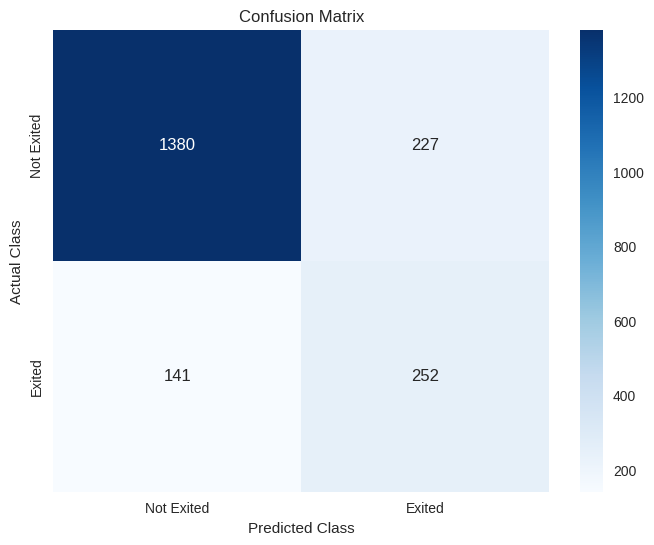

In [56]:
# Convert probabilities to class predictions based on the threshold of 0.5
y_test_pred_class = (y_test_pred_probs >= 0.5).astype(int)

# Print the classification report
print("Classification Report on Best Model:")
print(classification_report(y_test_tensor.cpu().numpy(), y_test_pred_class, target_names=['Not Exited', 'Exited']))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_tensor.cpu().numpy(), y_test_pred_class)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()